# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Reading & Displaying the csv file

In [2]:
titanic = pd.read_csv("titanic-passengers.csv",sep =";")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Getting more info on our raw data

In [3]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing :

Getting a summary about missing values :

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling missing values :

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) ###filling missing values
titanic['Cabin'].fillna('G6',inplace=True)
titanic['Embarked'].fillna('S',inplace=True)

Verifying that data is ready :

In [6]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All we need now is some features that are more useful than others :

In [7]:
df = titanic.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked','PassengerId'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,No,2,male,28.0,13.0000
1,No,3,male,25.0,7.6500
2,No,3,male,20.0,7.8542
3,No,3,female,29.0,21.0750
4,No,1,male,31.0,52.0000


As we notice sex and survived columns are catigorical we need to convert it numerical :

In [8]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Survived']=LabelEncoder().fit_transform(df['Survived'])

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,2,1,28.0,13.0000
1,0,3,1,25.0,7.6500
2,0,3,1,20.0,7.8542
3,0,3,0,29.0,21.0750
4,0,1,1,31.0,52.0000


# Importing libraries for logostics regression :

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# Building model :

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [13]:
print("model accuracy : ",accuracy_score(y_pred, y_test))

model accuracy :  0.8


<AxesSubplot:xlabel='Age', ylabel='Survived'>

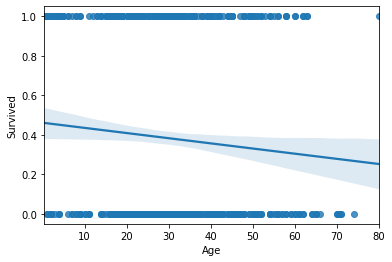

In [14]:
sns.regplot(x='Age',y='Survived',data=df)

# Using confusion matrix to evaluate logestic regression performence with precision :

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

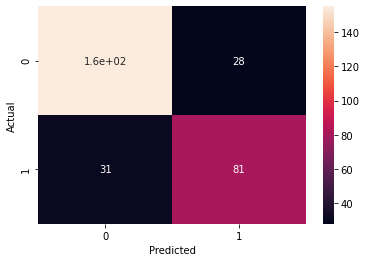

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Confusion Matrix Results :

* the model predicted that 160 passengers died which was a correct prediction.
* the model predicted that 28 passengers died which was a wrong prediction.
* the model predicted that 31 passengers survived which was a wrong prediction.
* the model predicted that 81 passengers survived which was a correct prediction.

# ROC / AUC :

* AUC (Area Under the receiving operating Curve) :is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve, the higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
* ROC (Receiver Operating Characteristics curve) : It is a probability curve that plots the TPR(True Positive Rate) against FPR(False Positive Rate) at various threshold values.

they are two of the most important evaluation metrics for checking any classification model's performance.

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [18]:
# roc curve
pred_prob = log_reg.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

auc_score = roc_auc_score(y_test, pred_prob[:,1])

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [23]:
print("The AUC = ",auc_score)

The AUC =  0.8409933645589384


In [24]:
import warnings
warnings.filterwarnings('ignore')

# Ploting ROC

FileNotFoundError: [Errno 2] No such file or directory: 'ROC.png'

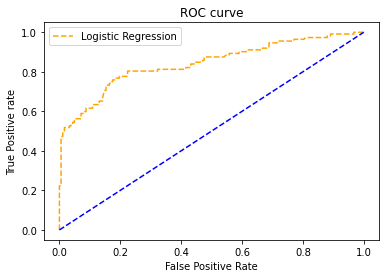

In [25]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()